### Project: Ensemble Techniques - Travel Package Purchase Prediction

## Description
### Background and Context

- You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

- A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

- One of the ways to expand the customer base is to introduce a new offering of packages.

- Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

- However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

- The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well being.

- However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

- You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced package.

### Objective

- To predict which customer is more likely to purchase the long term travel package.

### Data Dictionary

### Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Product taken flag
- Age: Age of customer
- PreferredLoginDevice: Preferred login device of the customer in last month
- CityTier: City tier
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisited: Total number of person came with customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of the trip in a year by customer
- Passport: Customer passport flag
- OwnCar: Customers owns a car flag
- NumberOfChildrenVisited: Total number of children visit with customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer
- Customer interaction data: 

### PitchSatisfactionScore: Sales pitch satisfactory score
- ProductPitched: Product pitched by a salesperson
- NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
- DurationOfPitch: Duration of the pitch by a salesman to customer

### `Learning Outcomes:`
- Exploratory Data Analysis

- Data Pre-processing
- Model building using Decision Tree, Bagging and Boosting techniques. Use Random Forest, XGBoost

In [314]:
#################################################################################
# Project: Ensemble Techniques - Travel Package Purchase Prediction            ##
# submitted by "Bindu S Pillai"                                                ##
# AIML PG Program condcuted by University of Texas, Austin. Dated - 3/26/2021  ##
#################################################################################

# Importing necessary libraries for execution of the project.

import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [366]:
#Loading the data from the excel file to a pandas DataFrame.
file1= "Tourism.xlsx"
tourism = pd.read_excel(file1,sheet_name='Tourism')
tourism.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
tourism.shape

(4888, 20)

In [4]:
tourism.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [5]:
tourism.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [6]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [7]:
print("Number of unique values in each column")
tourism.nunique()

Number of unique values in each column


CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

In [8]:
for i in ['ProdTaken','TypeofContact','CityTier', 'Occupation','Gender', 'PreferredPropertyStar', 'MaritalStatus', 'Passport','OwnCar']:
    print(tourism[i].value_counts())
    print(' '*30)
    print(tourism[i].value_counts(normalize=True))
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
                              
0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64
------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
                              
Self Enquiry       0.708205
Company Invited    0.291795
Name: TypeofContact, dtype: float64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
                              
1    0.652619
3    0.306874
2    0.040507
Name: CityTier, dtype: float64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
                              
Salaried          0.484452
Small Business    0.426350
Large Business    0.088789
Free Lancer       0.000409
Name: Occupation, dtype: float64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int

In [9]:
#Converting columns with type 'Object' into categorical variables
txt1=''
for i in tourism.columns: 
    if tourism[i].dtype == 'object': 
        tourism[i] = pd.Categorical(tourism[i])
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   int64   
 2   Age                      4662 non-null   float64 
 3   TypeofContact            4863 non-null   category
 4   CityTier                 4888 non-null   int64   
 5   DurationOfPitch          4637 non-null   float64 
 6   Occupation               4888 non-null   category
 7   Gender                   4888 non-null   category
 8   NumberOfPersonVisited    4888 non-null   int64   
 9   NumberOfFollowups        4843 non-null   float64 
 10  ProductPitched           4888 non-null   category
 11  PreferredPropertyStar    4862 non-null   float64 
 12  MaritalStatus            4888 non-null   category
 13  NumberOfTrips            4748 non-null   float64 
 14  Passport

In [10]:
#Gender has typos. Fixing it.
tourism.replace({'Gender': 'Fe Male'},'Female', inplace=True)
tourism['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [155]:
#Dropping id before EDA
travel=tourism.drop("CustomerID", axis = 1)

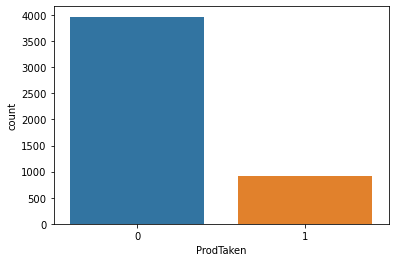

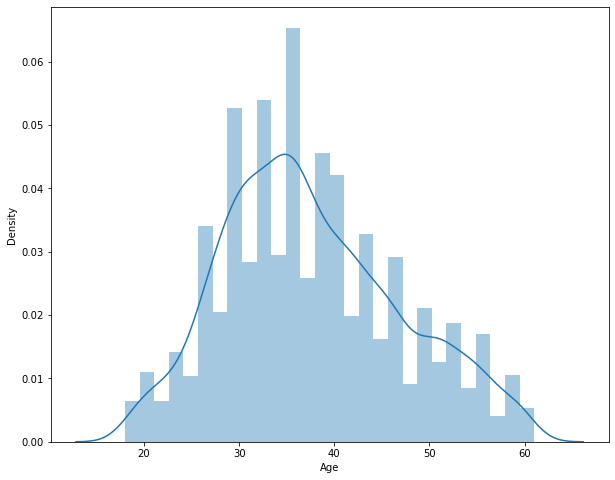

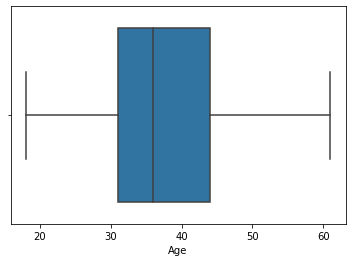

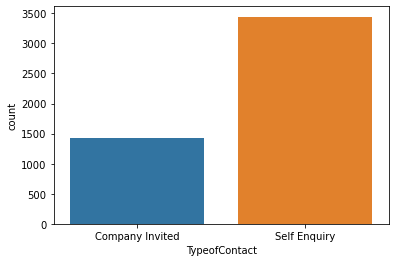

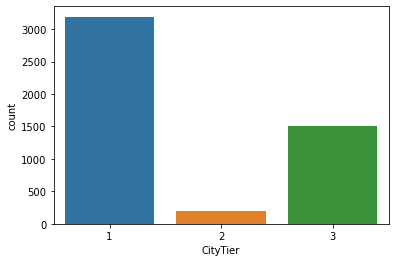

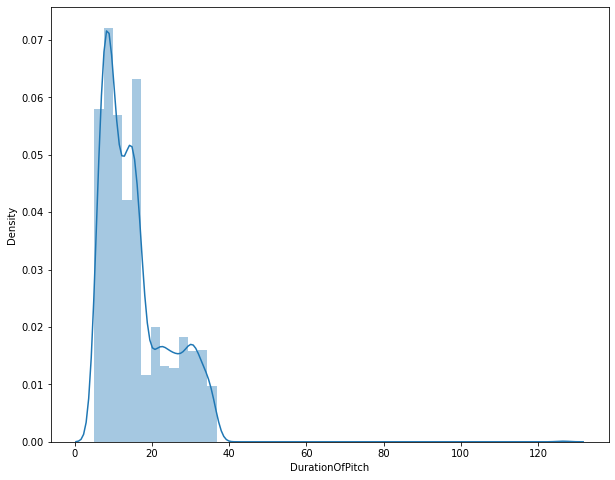

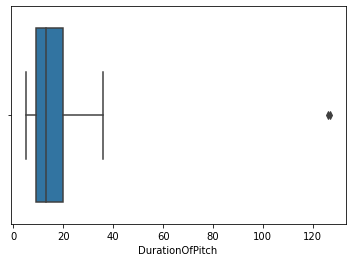

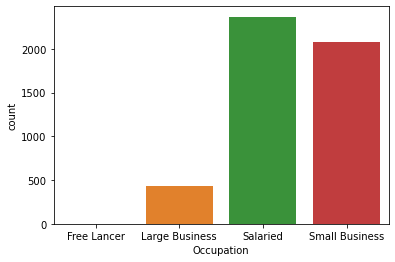

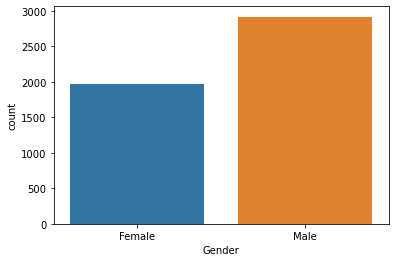

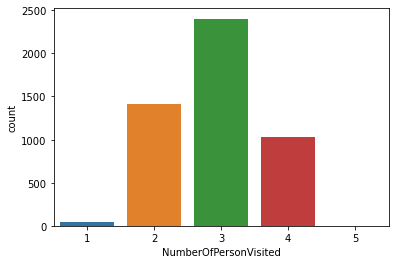

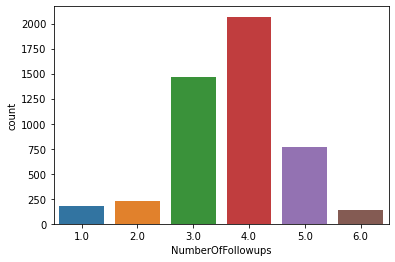

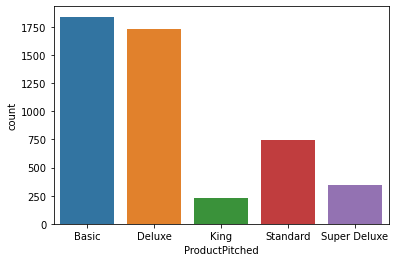

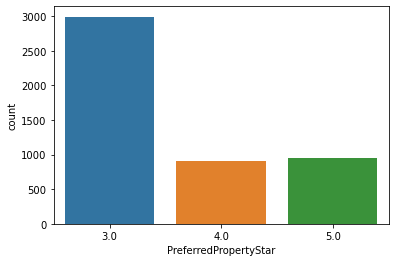

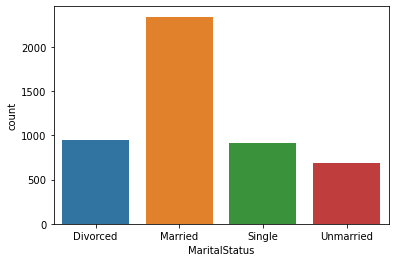

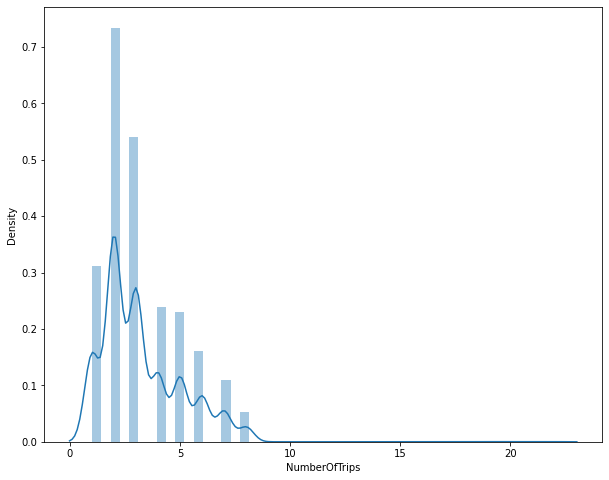

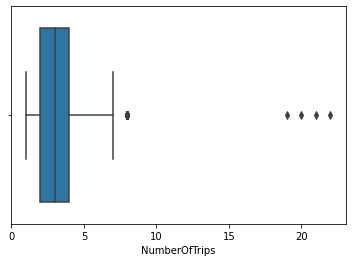

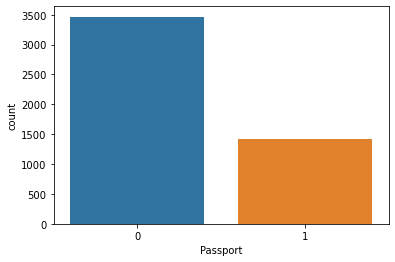

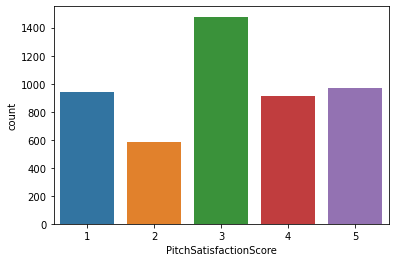

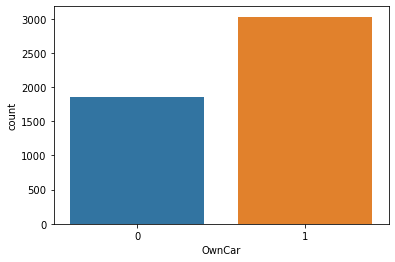

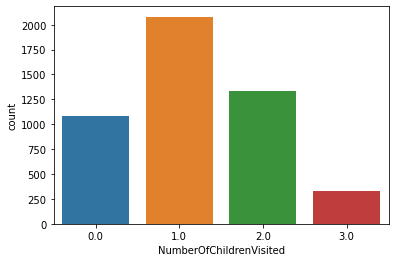

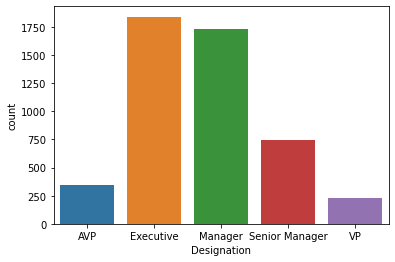

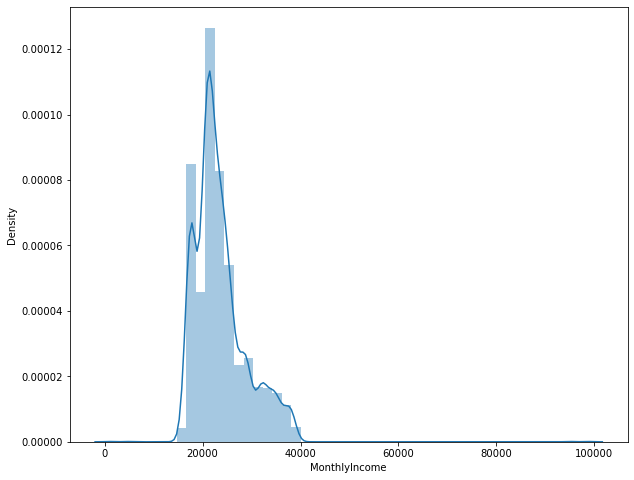

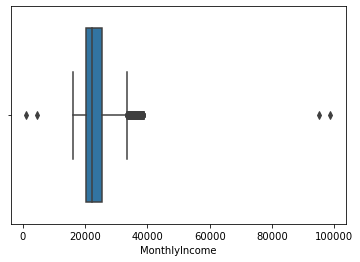

In [12]:
for i in travel.columns:
    if i == 'DurationOfPitch' or i == 'Age'  or i == 'NumberOfTrips' or i == 'MonthlyIncome':
        plt.figure(figsize=(10,8))
        sns.distplot(travel[i])
        plt.show()
        sns.boxplot(travel[i])
        plt.show()
    else:
        sns.countplot(x=i,data=travel)
        plt.show()

Insight: Extreme right skewness for monthly income. Number of Trips are right skewed.

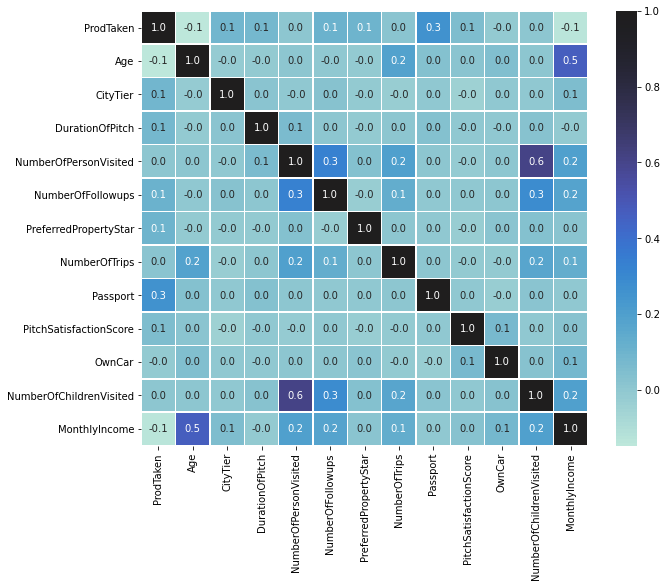

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(travel.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

### Insight:
    It may be due to impurity of data that Target variable(ProdTaken) has weak correlation to most features. 
    The feature, passport has the most correlation, which is only 0.3.
    Other variables don't seem to have high correlation except for number of persons visited and number children visited,
    which  is expected. Age and Monthly Income are highly correlated. Number of Person visited and number of followups seems
    related somewhat.
    

In [14]:
#Trying crosstab for ctaegorical variables to see if one value of a column has more correlation to target variable.

pd.crosstab(travel['TypeofContact'], travel['ProdTaken'], normalize='index')


ProdTaken,0,1
TypeofContact,,
Company Invited,0.781536,0.218464
Self Enquiry,0.823751,0.176249


### Insight: 
Company invited people are slightly more likely to buy package.

In [15]:
pd.crosstab(travel['CityTier'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
CityTier,,
1,0.836991,0.163009
2,0.767677,0.232323
3,0.764000,0.236000


Insight: City Tier 2 and 3 seem have higher rate of real customers (those who will buy a package)

In [16]:
pd.crosstab(travel['NumberOfFollowups'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
NumberOfFollowups,,
1.0,0.886364,0.113636
2.0,0.895197,0.104803
3.0,0.833561,0.166439
4.0,0.816731,0.183269
5.0,0.751302,0.248698
6.0,0.602941,0.397059


Insight: The more followups the higher is the rate of real customers (those who will buy a package). 6 followups clearly yielded best results.

In [17]:
pd.crosstab(travel['ProductPitched'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
ProductPitched,,
Basic,0.700326,0.299674
Deluxe,0.882217,0.117783
King,0.913043,0.086957
Standard,0.832884,0.167116
Super Deluxe,0.941520,0.058480


Insight: Basic package has clear adavantage of most buyers followed by Standard and deluxe. Super Deluxe has least buyers followed by King

In [368]:
pd.crosstab(tourism['Occupation'], tourism['ProdTaken'])

ProdTaken,0,1
Occupation,,
Free Lancer,0,2
Large Business,314,120
Salaried,1954,414
Small Business,1700,384


In [365]:
pd.crosstab(tourism['Occupation'], tourism['ProdTaken'], normalize='index')

ProdTaken,0,1
Occupation,,
Free Lancer,0.000000,1.000000
Large Business,0.723502,0.276498
Salaried,0.825169,0.174831
Small Business,0.815739,0.184261


Insight: Large Business owners have slightly higher chance of buying. Freelancers are only 2 rows, so not that significant.

In [19]:
pd.crosstab(travel['NumberOfPersonVisited'], travel['ProdTaken'])

ProdTaken,0,1
NumberOfPersonVisited,,
1,39,0
2,1151,267
3,1942,460
4,833,193
5,3,0


In [20]:
pd.crosstab(travel['NumberOfPersonVisited'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
NumberOfPersonVisited,,
1,1.000000,0.000000
2,0.811707,0.188293
3,0.808493,0.191507
4,0.811891,0.188109
5,1.000000,0.000000


Insight: 3 people travelling along the customer has the highest chance of buying the package followed by 2 and 4 both having similar chance. If 1 person or 5 people are travelling along, zero chance of buying

In [21]:
pd.crosstab(travel['Gender'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
Gender,,
Female,0.826572,0.173428
Male,0.801783,0.198217


Insight: Men have slightly higher chance of buying travel package.

In [22]:
pd.crosstab(travel['PreferredPropertyStar'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
PreferredPropertyStar,,
3.0,0.838958,0.161042
4.0,0.800657,0.199343
5.0,0.738494,0.261506


Insight: As the preferred star of a customer goes up there is slightly higher chance of buying travel package.

In [23]:
pd.crosstab(travel['MaritalStatus'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
MaritalStatus,,
Divorced,0.869474,0.130526
Married,0.860684,0.139316
Single,0.668122,0.331878
Unmarried,0.756598,0.243402


Insight: Single and Unmarried highly likely to buy travel package in that order. Divorced and married are less likely in that order

In [24]:
pd.crosstab(travel['Passport'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
Passport,,
0,0.877092,0.122908
1,0.652602,0.347398


Insight: Having a passport is an indicator of much higher probability of buying. 

In [25]:
pd.crosstab(travel['PitchSatisfactionScore'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
PitchSatisfactionScore,,
1,0.847134,0.152866
2,0.849829,0.150171
3,0.786198,0.213802
4,0.822368,0.177632
5,0.783505,0.216495


Insight: The higher the satisfaction score the higher is the rate of real customers (those who will buy a package). Score of 3 and 5 have highest percentage of buyers.

In [26]:
pd.crosstab(travel['OwnCar'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
OwnCar,,
0,0.806034,0.193966
1,0.815303,0.184697


Insight: Owning a car or not is not an indicator of buying. 

In [27]:
pd.crosstab(travel['Designation'], travel['ProdTaken'], normalize='index')

ProdTaken,0,1
Designation,,
AVP,0.941520,0.058480
Executive,0.700326,0.299674
Manager,0.882217,0.117783
Senior Manager,0.832884,0.167116
VP,0.913043,0.086957


Insight: Executives followed by Senior Manager are highly likely likely to buy package compared to VP or AVP. Manager follows Senior manager.

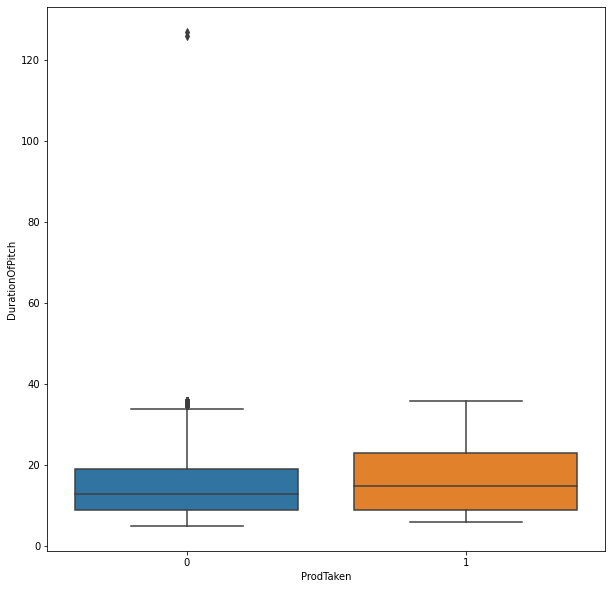

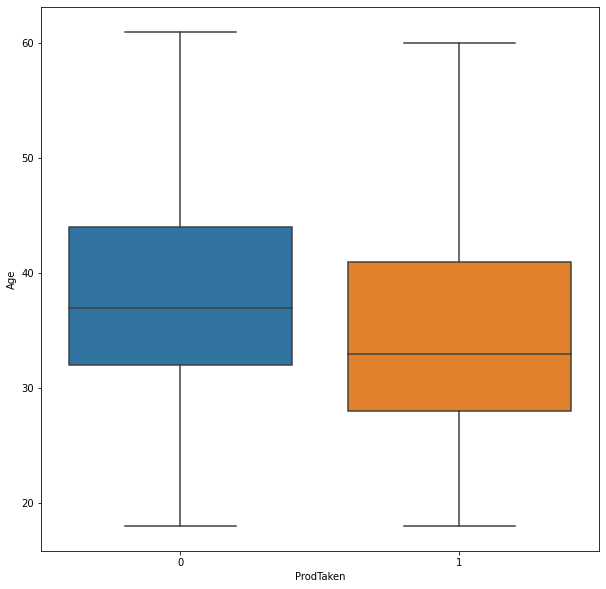

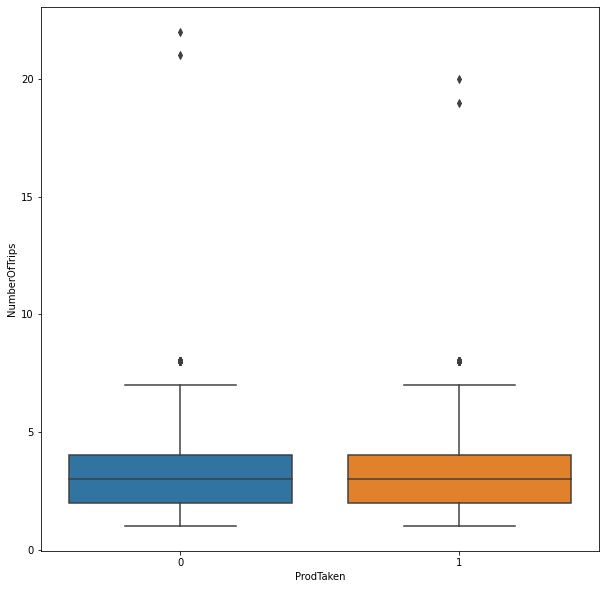

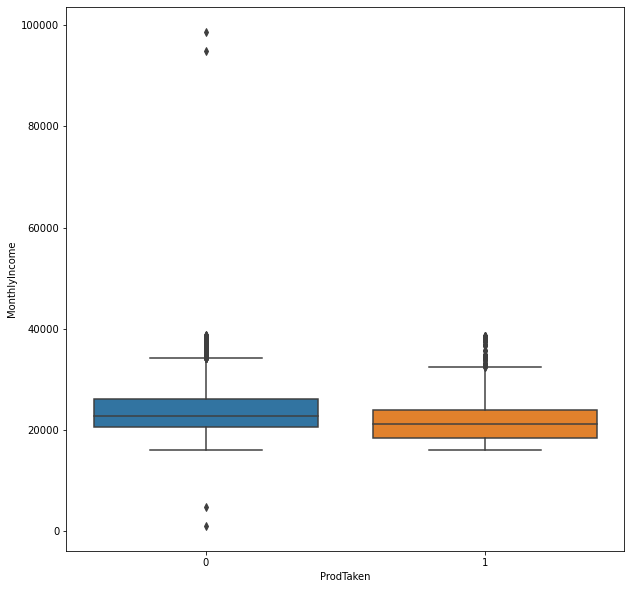

In [28]:
#Box plot of Target variable versus continuous variables

for i in ['DurationOfPitch','Age','NumberOfTrips','MonthlyIncome']:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=travel,x='ProdTaken',y=i)
    plt.show()


### Insights: 
1. distribution of income versus ProdTaken seems almost similar for both buyers and non-buyers. Both have bunch of outliers. 
One difference is people with 20K to 25K monthly income are the most non-buyers. IQR for buyers is spread on both sides of 
20K (seems to be between 19k to 22K). 
Outliers on the low side of income is for non-buyers as expectable. High income outlliers are common for both classes.

2. Duration of pitch has outliers for non-buyers.

3. No. of trips have outliers for both classes.

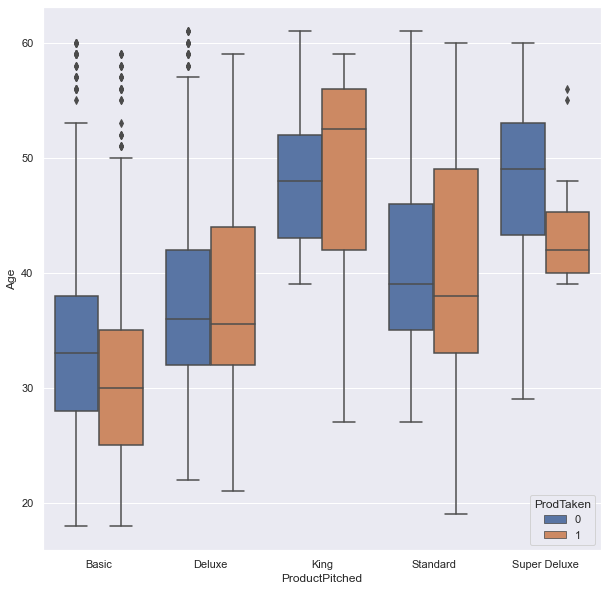

<Figure size 720x720 with 0 Axes>

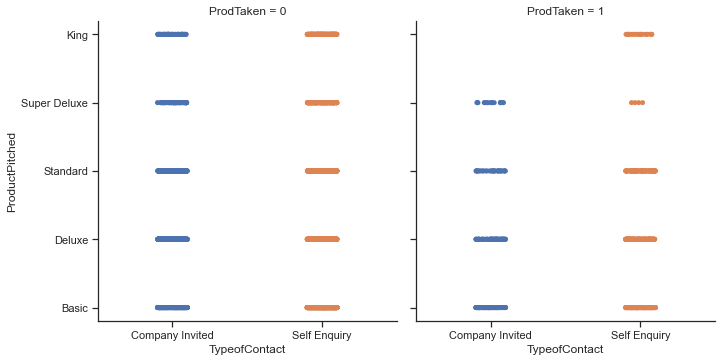

<Figure size 720x720 with 0 Axes>

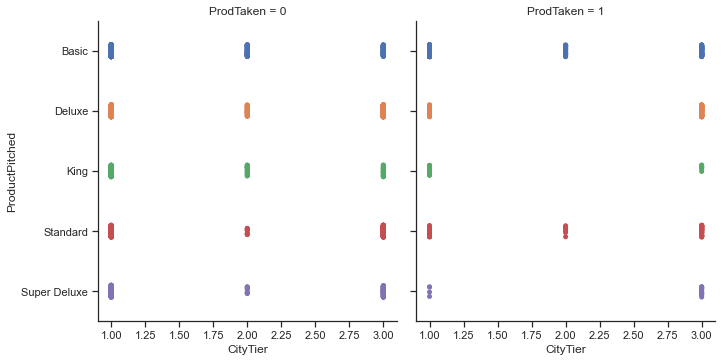

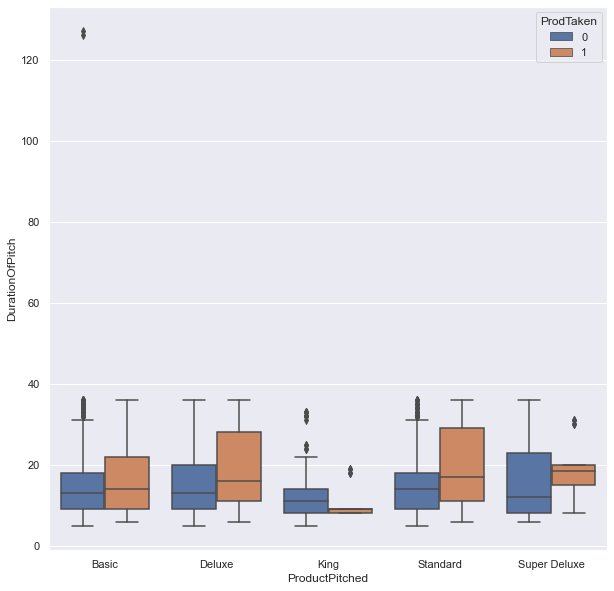

<Figure size 720x720 with 0 Axes>

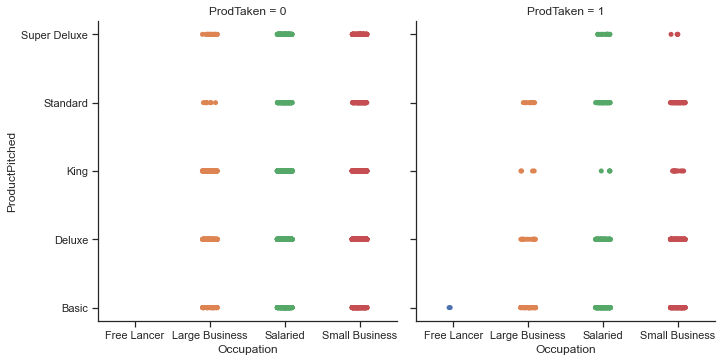

<Figure size 720x720 with 0 Axes>

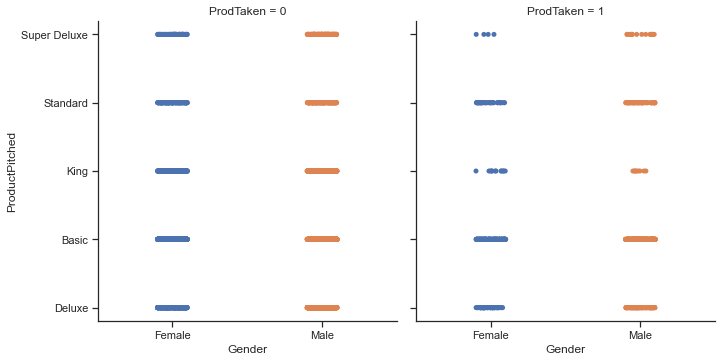

<Figure size 720x720 with 0 Axes>

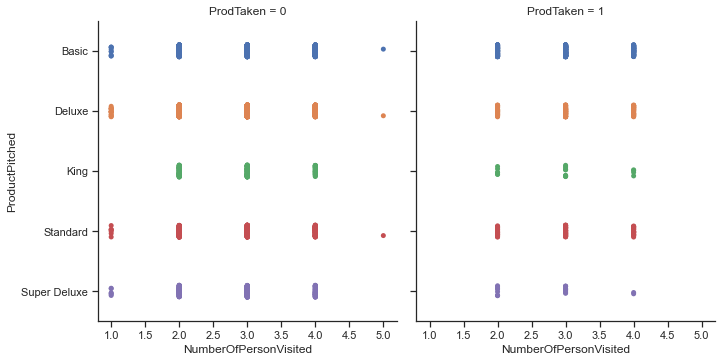

<Figure size 720x720 with 0 Axes>

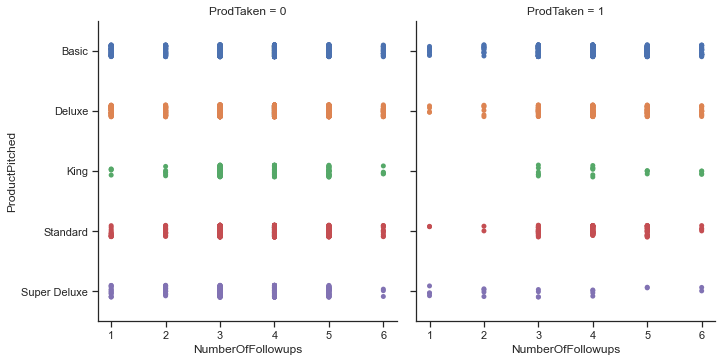

<Figure size 720x720 with 0 Axes>

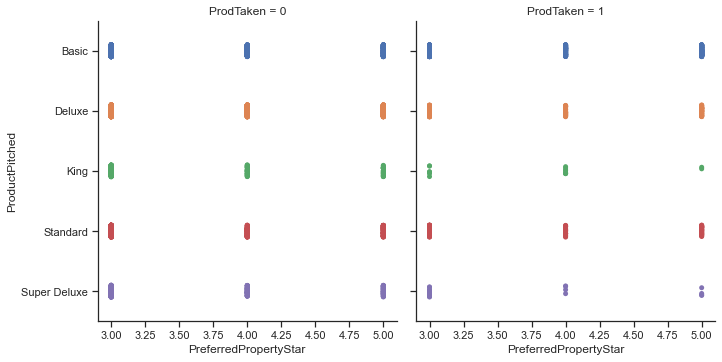

<Figure size 720x720 with 0 Axes>

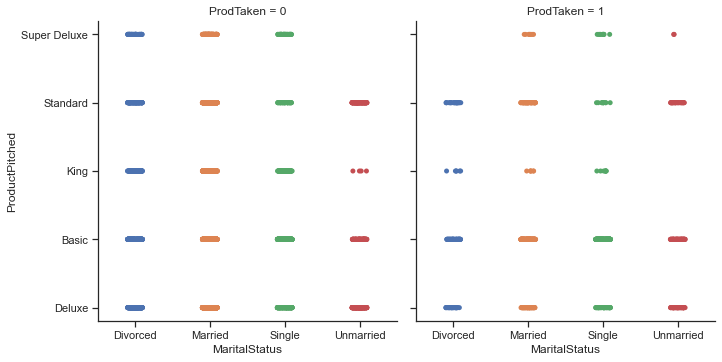

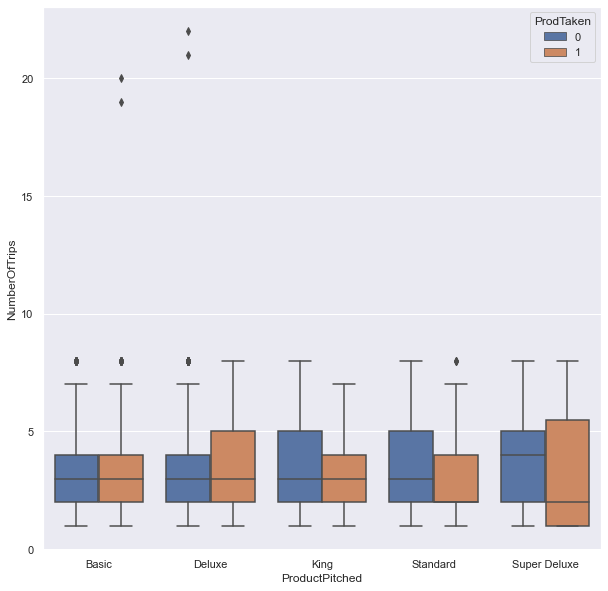

<Figure size 720x720 with 0 Axes>

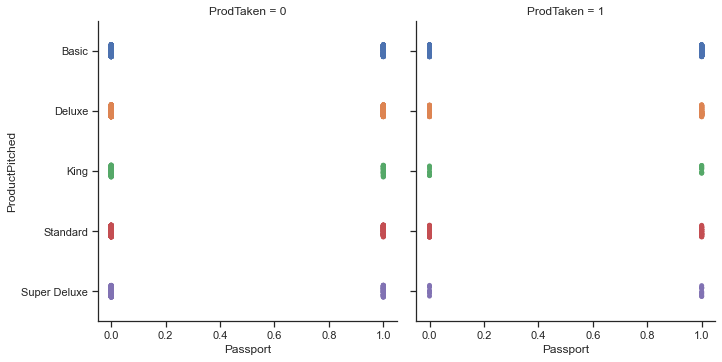

<Figure size 720x720 with 0 Axes>

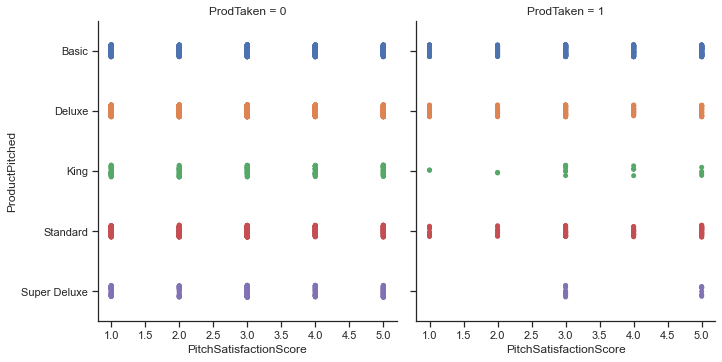

<Figure size 720x720 with 0 Axes>

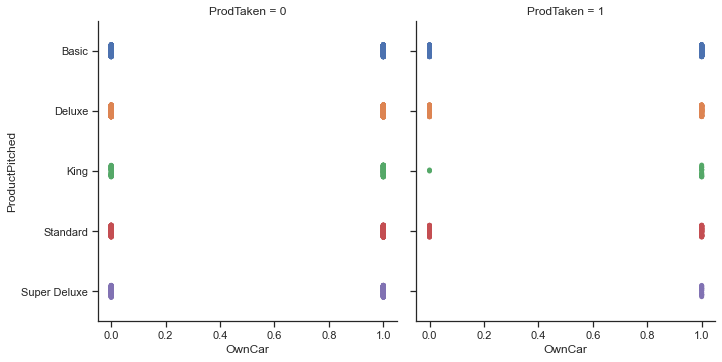

<Figure size 720x720 with 0 Axes>

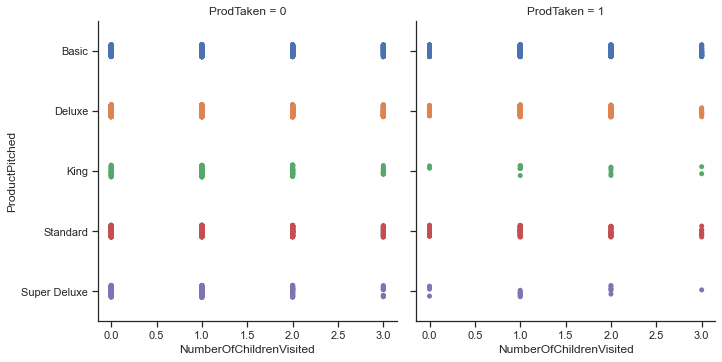

<Figure size 720x720 with 0 Axes>

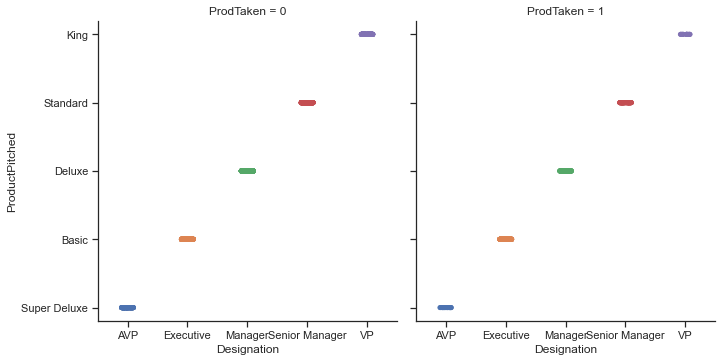

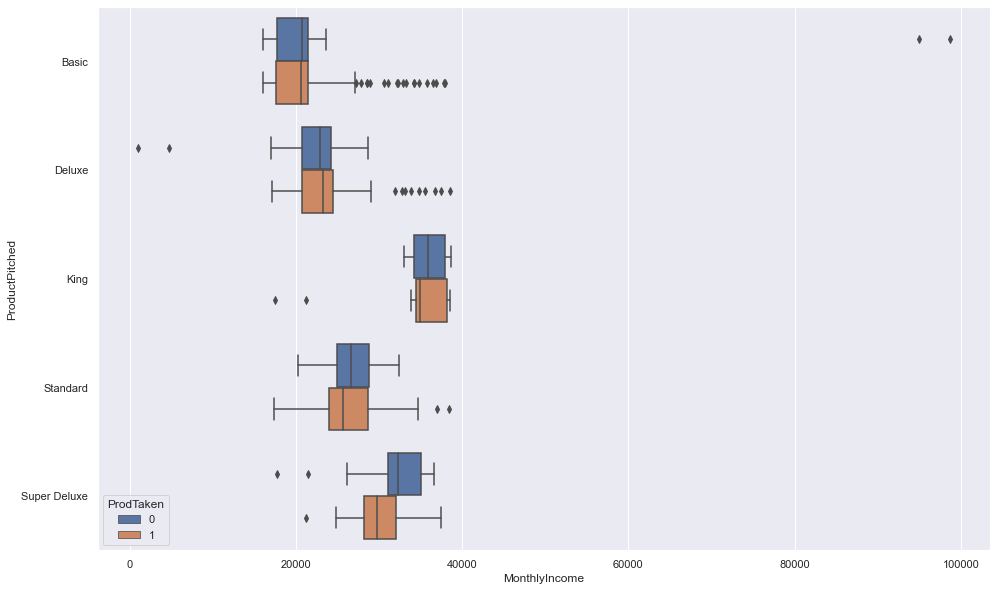

In [57]:
#Customer Profile
for i in travel.columns:
    sns.set(color_codes=True)
    if i == 'DurationOfPitch' or i == 'Age'  or i == 'NumberOfTrips':
        plt.figure(figsize=(10,10))
        sns.boxplot(data=travel,x='ProductPitched',y=i, hue = 'ProdTaken' )
        plt.show()
    elif i == 'MonthlyIncome':
        plt.figure(figsize=(16,10))
        sns.boxplot(data=travel,y='ProductPitched',x=i, hue = 'ProdTaken', orient= 'h' )
        plt.show()
    elif i != 'ProdTaken' and i != 'ProductPitched':
        plt.figure(figsize=(10,10))
        sns.set_theme(style="ticks")
        sns.catplot(x = i , y = 'ProductPitched', col = 'ProdTaken', data = travel)
        plt.show()


### Insights: 
### Customer Profile of those customers who bought the package, for different packages 

### Some general Characteristics for few features:

   No. of kids 1 or 5 did not buy anything.
   Profession, FreeLancer only bought very few Basic package and nothing else.
   City Tier 2 only bought Basic and Standard
   
*********************************************************************************************************

### For different packages, the features not mentioned under them except if mentioned in general characteristics have no significance.

    Basic : Most customers have a Monthly income around 20K (bunch outliers with income almost upto 40K)
            Only pitched to designation executive
            Most customers took 2-4 trips. Oulier upto 8 trips. couple outliers upto 20 trips.
            Most customers, Age from 25 to 35
            Most customers Duration of pitch from 10-22 mins.
    
    Standard: Most customers have Monthly income in  25K - 30K range (couple outliers with income almost upto 40K)
            Only pitched to designation Senior Manager
            Most customers took 2-4 trips. Oulier upto 8 trips
            Mostly with no. of followups 3, 4 and 5 , lesser with other values.
            Most customers, Age from 33 to 49
            Most customers, duration of pitch from 12-30 mins.
            
    Deluxe: Most customers have Monthly income in  20K - 25K range(bunch outliers with income almost upto 40K)
            Only pitched to designation Manager
            Most customers took 2-5 trips.
            Most customers took 1-6 trips.
            Less customers with no. of followups 1 than others
            Most customers, Age from 32 to 44
            Most customers, duration of pitch from 12-30 mins.
            
    Super Deluxe: Monthly income around 30K (one lower outlier 22k)
           Only pitched to designation AVP
           Only customers who owned a car 
           Only customers with pitch satisfaction score of 3 or 5.
           Divorced people did not buy and very little unmarried people bought
           Mostly with no. of followups 1,2,3, 4
           Much less with 4 kids compaered to 2 and 3
           more male customers than female
           Mostly salaried few small business
           Most customers, Age from 40 to 45
           More company Invited
            Most customers, duration of pitch from 15-20 mins (outlier upto 30)
            
    King : Monthly income around in  34K - 38K range (couple outliers from 17k-21K)
            Only pitched to designation VP 
            Majority customers who owned a car
            Majority customers with pitch satisfaction score of 3 or above
            More customers without a passport bought King than those with a passport
            Most customers took 2-4 trips.
            Unmarried people did not buy King.
            Very few with prefrred property star of 5 bought compared to other stars.
            Mostly with no. of followups 3 and 4. Some with 5 and 6.
            More Female than male
            Mostly small business few salaried and large business
            Most customers, Age from 42 to 56
            Only Self enquiry
            Most customers, duration of pitch around 10 mins.(outlier upto 20)

## Illustrate the insights based on EDA
**Key meaningful observations on the relationship between variables**

- This is the second question for the project.
- Insights have been provided throughout the EDA (refer to code above this cell) at different places. 
- Previous cell has customer profile and gives lot of information about data and relation between different variables. One example is above cells explains what packge is pitched to people with what designation and many more.




## Data Pre-processing
**Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling**

Below many steps are preparing data and cleaning up, Outlier treatment etc.

In [156]:
#Duplicated
df=travel.duplicated()
df.sum()

141

In [157]:
#Dropping duplicates
travel= travel.drop_duplicates()

In [158]:
travel.duplicated().sum()

0

In [159]:
#Missing Value tratment

def missing(df):
    
    dtype = df.dtypes
    
    missing = df.isnull().sum(axis=0)
    missing_pct = missing/len(df)

    unique = df.apply(pd.Series.nunique)
    
    output = pd.concat([dtype, missing, missing_pct, unique], axis=1)
    output.columns = ['dtype', 'missing', 'missing_pct', 'unique']
    
    return output

In [160]:
Missing_travel = missing(travel)

In [161]:
Missing_travel


,dtype,missing,missing_pct,unique
ProdTaken,int64,0,0.000000,2
Age,float64,216,0.045502,44
TypeofContact,category,25,0.005266,2
CityTier,int64,0,0.000000,3
DurationOfPitch,float64,246,0.051822,34
Occupation,category,0,0.000000,4
Gender,category,0,0.000000,2
NumberOfPersonVisited,int64,0,0.000000,5
NumberOfFollowups,float64,44,0.009269,6
ProductPitched,category,0,0.000000,5


In [162]:
for i in ['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisited']:
    print(tourism[i].value_counts())
    print(' '*30)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
                              
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
                              
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
                              
2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64
                              
1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisited, dtype: int64
                              


In [163]:
#Treating Missing Values

#Age Null values can be treated with average values.

travel["Age"].fillna(travel["Age"].mean(), inplace = True)

#As DurationOfPitch is skewed, Null values can be treated with median values.

travel["DurationOfPitch"].fillna(travel["DurationOfPitch"].median(), inplace = True)

#Self Enquiry is the most occuring value for Type of contact. Refer to previous cell results

travel['TypeofContact'].fillna('Self Enquiry', inplace = True)  

#4 is the most occuring value for NumberOfFollowups. Refer to above cell results
travel['NumberOfFollowups'].fillna(4, inplace = True)  

# The most PreferredPropertyStar value is 3. Refer to above cell results
travel['PreferredPropertyStar'].fillna(3, inplace = True)  

# The most NumberOfTrips value is 2. Refer to above cell results
travel['NumberOfTrips'].fillna(2, inplace = True)

# The most NumberOfChildrenVisited value is 1. Refer to above cell results
travel['NumberOfChildrenVisited'].fillna(1, inplace = True)

#Since lot of outliers found by EDA for MonthlyIncome. Using median value for treating the nulls
travel["MonthlyIncome"].fillna(travel["MonthlyIncome"].median(), inplace = True)

In [164]:

# For reference the metrics are shown here for monthly income

print(" Average Income", travel["MonthlyIncome"].mean())
print(" Median Income", travel["MonthlyIncome"].median())
print(" Most occuring Income", travel["MonthlyIncome"].mode())


 Average Income 23541.308826627344
 Median Income 22311.0
 Most occuring Income 0    22311.0
dtype: float64


In [165]:
travel.isnull().sum()

ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [166]:
travel.skew()

ProdTaken                  1.594828
Age                        0.384184
CityTier                   0.734402
DurationOfPitch            1.846130
NumberOfPersonVisited      0.028372
NumberOfFollowups         -0.380692
PreferredPropertyStar      0.898797
NumberOfTrips              1.521248
Passport                   0.927727
PitchSatisfactionScore    -0.102405
OwnCar                    -0.484362
NumberOfChildrenVisited    0.278938
MonthlyIncome              2.054963
dtype: float64

In [167]:
tourism.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [168]:
#Treating Outliers
#DurationOfPitch
#By looking at box and whisker plot above, all outliers are above 100
df=travel[travel["DurationOfPitch"] > 100]
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
1434,0,37.585522,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.000000,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


In [169]:
### From above, for DurationOfPitch IQR=11 and upper whisker = 20 + 1.5*11 = 36.5 (Q1 = 9, Q3=20, IQR = Q3-Q1 =11).
### So we can replace the above outliers with 37
travel.loc[1434, 'DurationOfPitch'] = 37
travel.loc[3878, 'DurationOfPitch'] = 37

In [170]:
##Verification step
travel[travel["DurationOfPitch"] > 100]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [171]:
##Verification step
print(travel.iloc[1434])
print(travel.iloc[3878])

ProdTaken                                0
Age                                37.5855
TypeofContact              Company Invited
CityTier                                 3
DurationOfPitch                         37
Occupation                        Salaried
Gender                                Male
NumberOfPersonVisited                    2
NumberOfFollowups                        3
ProductPitched                       Basic
PreferredPropertyStar                    3
MaritalStatus                      Married
NumberOfTrips                            3
Passport                                 0
PitchSatisfactionScore                   1
OwnCar                                   1
NumberOfChildrenVisited                  1
Designation                      Executive
MonthlyIncome                        18482
Name: 1434, dtype: object
ProdTaken                               1
Age                                    25
TypeofContact                Self Enquiry
CityTier                       

In [173]:
#Treating Outliers
#NumberOfTrips
# By looking at box and whisker plot above, all outliers are above 15
travel.loc[travel["NumberOfTrips"] > 15, "NumberOfTrips" ]


385     19.0
816     21.0
2829    20.0
3260    22.0
Name: NumberOfTrips, dtype: float64

In [174]:
#Rows with outliers 
travel[travel["NumberOfTrips"] > 15]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


In [175]:
# By looking at results from describe function above, Q1=2, Q3=4, so upper whisker = 4+ (4-2)*1.5 = 4+3 =7 
### So we can replace the above outliers with 37
travel.loc[travel["NumberOfTrips"] > 15, "NumberOfTrips" ]=7

In [176]:
##Verification step
travel[travel["NumberOfTrips"] > 15]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [177]:
##Verification step
print(travel.iloc[385])
print(travel.iloc[816])
print(travel.iloc[2829])
print(travel.iloc[3260])

ProdTaken                                1
Age                                     30
TypeofContact              Company Invited
CityTier                                 1
DurationOfPitch                         10
Occupation                  Large Business
Gender                                Male
NumberOfPersonVisited                    2
NumberOfFollowups                        3
ProductPitched                       Basic
PreferredPropertyStar                    3
MaritalStatus                       Single
NumberOfTrips                            7
Passport                                 1
PitchSatisfactionScore                   4
OwnCar                                   1
NumberOfChildrenVisited                  1
Designation                      Executive
MonthlyIncome                        17285
Name: 385, dtype: object
ProdTaken                                0
Age                                     39
TypeofContact              Company Invited
CityTier                     

## Insights: 
- I feel that all values of Monthly income are important. So not treating outliers.

In [189]:
travel["ProductPitched"].value_counts()

Basic           1800
Deluxe          1684
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64

In [191]:
##One hot encoding of categorical columns
Cat_cols=["TypeofContact","Occupation","Designation","MaritalStatus", "ProductPitched", "Gender" ]

In [192]:
travel=pd.get_dummies(travel, columns=Cat_cols)
travel.head(10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,Gender_Female,Gender_Male
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,...,0,1,0,0,1,0,0,0,1,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,0,0,1,0,0,0,0,1
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,...,0,1,0,1,0,0,0,0,0,1
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,1,0,0,0,0,1,0
4,0,37.585522,1,8.0,2,3.0,4.0,1.0,0,5,...,0,0,0,1,0,0,0,0,0,1
5,0,32.000000,1,8.0,3,3.0,3.0,1.0,0,5,...,0,1,0,1,0,0,0,0,0,1
6,0,59.000000,1,9.0,2,2.0,5.0,5.0,1,2,...,0,0,0,1,0,0,0,0,1,0
7,0,30.000000,1,30.0,3,3.0,3.0,2.0,0,2,...,1,0,0,1,0,0,0,0,0,1
8,0,38.000000,1,29.0,2,4.0,3.0,1.0,0,3,...,0,0,1,0,0,0,1,0,0,1
9,0,36.000000,1,33.0,3,3.0,3.0,7.0,0,3,...,0,0,0,0,1,0,0,0,0,1


In [199]:
pd.set_option('display.max_columns', None)

travel.head(10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,Gender_Female,Gender_Male
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0,37.585522,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
5,0,32.000000,1,8.0,3,3.0,3.0,1.0,0,5,1,1.0,18068.0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
6,0,59.000000,1,9.0,2,2.0,5.0,5.0,1,2,1,1.0,17670.0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
7,0,30.000000,1,30.0,3,3.0,3.0,2.0,0,2,0,1.0,17693.0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
8,0,38.000000,1,29.0,2,4.0,3.0,1.0,0,3,0,0.0,24526.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
9,0,36.000000,1,33.0,3,3.0,3.0,7.0,0,3,1,0.0,20237.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1


## Model building 
- Build bagging classifier, random forest and decision tree.

In [200]:
## Split data into train and test sets.
x=travel.drop("ProdTaken", axis=1)
y=travel["ProdTaken"]


In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1,stratify=y)

In [1]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')

In [213]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    
    #Accuracy of the model
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Decision Tree. 
 - First simple tree, followed by tuning hyper parameters on it using GridSearchCV

In [210]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [211]:
print("Accuracy on training set : ",dTree.score(x_train, y_train))
print("Accuracy on test set : ",dTree.score(x_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.8757894736842106


In [214]:
# Recall on train and test
dt_score=get_metrics_score(dTree)


Accuracy on training set :  1.0
Accuracy on test set :  0.8757894736842106
Recall on training set :  1.0
Recall on test set :  0.7052238805970149
Precision on training set :  1.0
Precision on test set :  0.6585365853658537


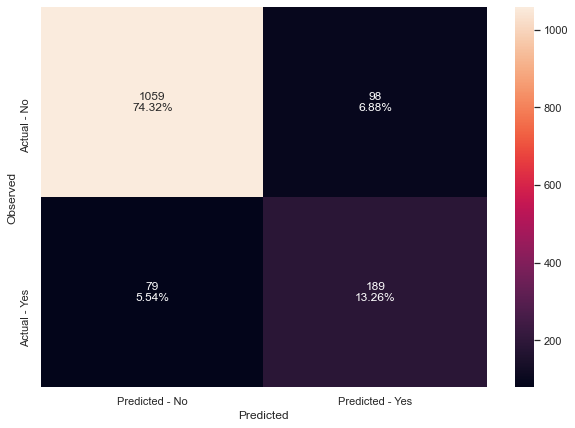

In [215]:
make_confusion_matrix(dTree,y_test)

### Insights:
- For simple decision with default parameters,scores look good (both precision and recall) for both training and testing data. So this is a good model. 

- As we are concerned about marketing cost, we want to reduce false positives. Accuracy is important, which is pretty high at 0.65. Recall also high at 0.7 which will reduce false negatives so less lost customers by not picking them.

- It looks like, overfitting training data, but still test data has fairly good performance as well.

### Now Let's see if performance of Decision Tree can be improved by tuning Hyper parameters.

In [217]:
##Tuning hyper parameters using GridsearchCV
# Choose the type of classifier. 
ModelDT = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ModelDT, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
ModelDT = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ModelDT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

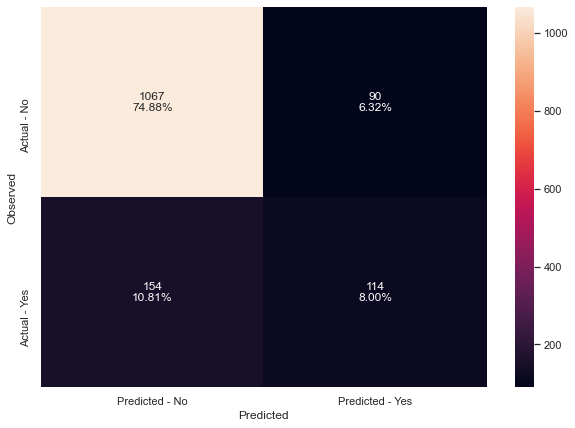

In [219]:
make_confusion_matrix(ModelDT,y_test)

In [218]:
dt_score=get_metrics_score(ModelDT)

Accuracy on training set :  0.8437688139674895
Accuracy on test set :  0.8287719298245614
Recall on training set :  0.476038338658147
Recall on test set :  0.4253731343283582
Precision on training set :  0.6094069529652352
Precision on test set :  0.5588235294117647


### Insights:
Both precision and recall got worse on test data. Tuning parameters did not help with performance
The decision tree model looks better with default parametrs.

### Bagging Classifier. 
- First simple model with default parameters, followed by tuning hyper parameters on it using GridSearchCV

In [221]:
#base_estimator for bagging classifier is a decision tree by default
bagging_model=BaggingClassifier(random_state=1)
bagging_model.fit(x_train,y_train)

BaggingClassifier(random_state=1)

In [222]:
bagging_model_score=get_metrics_score(bagging_model)

Accuracy on training set :  0.9942805538832029
Accuracy on test set :  0.9080701754385965
Recall on training set :  0.9696485623003195
Recall on test set :  0.6231343283582089
Precision on training set :  1.0
Precision on test set :  0.8477157360406091


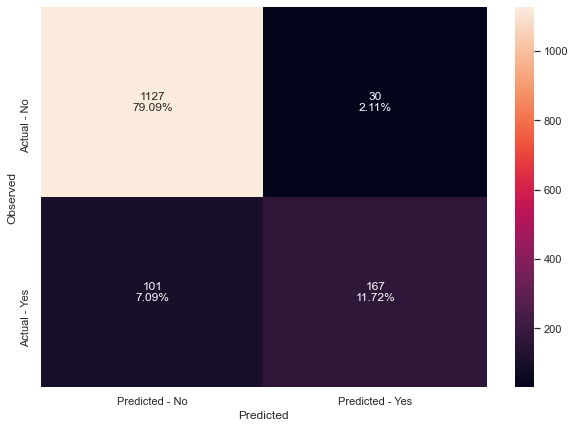

In [223]:
make_confusion_matrix(bagging_model,y_test)

### Random Forest Classifier

In [224]:
randomforest_model=RandomForestClassifier(random_state=1)
randomforest_model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [225]:
randomforest_model_score=get_metrics_score(randomforest_model)

Accuracy on training set :  1.0
Accuracy on test set :  0.9052631578947369
Recall on training set :  1.0
Recall on test set :  0.5559701492537313
Precision on training set :  1.0
Precision on test set :  0.9030303030303031


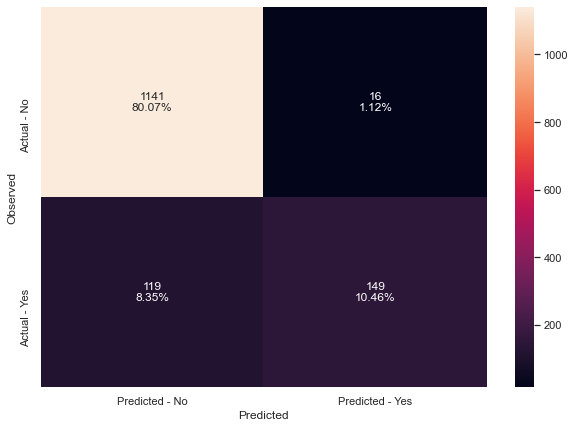

In [226]:
make_confusion_matrix(randomforest_model,y_test)

**With default parameters:**

- Both models - Bagging classifiers as well as random forest classifier are overfitting the train data.
- Random forest is slightly less overfitting than Bagging classifier
- Both models are giving similar performance in terms of accuracy.
- Bagging classifier is better on recall than Random forest however Accuracy is better for random forest

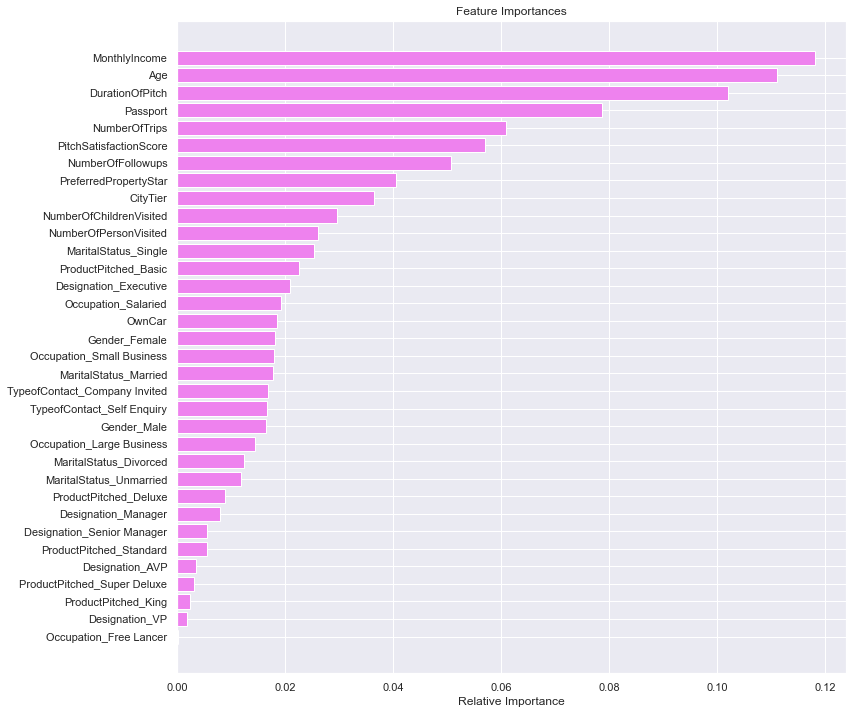

In [363]:
## Which features are important in predicting Tragte variable

importances = randomforest_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Insight:
Monthly Income seems to be most important feature followed by Age,Duration Of Pitch, Passport,Number OF Trips, Pitch satisfaction Score and Number OF Follow ups.

## Hyperparameter Tuning

### Bagging Classifier

In [231]:
Model_BG_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(Model_BG_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
Model_BG_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Model_BG_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [232]:
#Calculating scores for tuned bagging classifier
Model_BG_tuned_score=get_metrics_score(Model_BG_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.92
Recall on training set :  1.0
Recall on test set :  0.6604477611940298
Precision on training set :  1.0
Precision on test set :  0.885


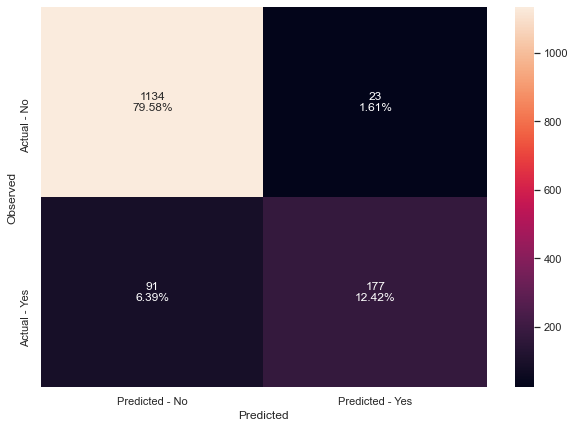

In [233]:
make_confusion_matrix(Model_BG_tuned, y_test)

### Insights
- Train Accuracy, Recall on the tuned bagging model indicates the model is slightly less overfitting, as they reduced. 
- Accuracy on test data slightly reduced, still high on the tuned model.
- Test Recall and Precision both have improved by tuning.


## Hyperparameter Tuning

### Random Forest

In [261]:
Model_RF_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [25,50,75],
    "min_samples_leaf": np.arange(2, 7),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(Model_RF_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
Model_RF_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Model_RF_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=2,
                       n_estimators=50, random_state=1)

In [262]:
#Calculating scores for tuned bagging classifier
Model_RF_tuned_score=get_metrics_score(Model_RF_tuned)

Accuracy on training set :  0.9695966285370259
Accuracy on test set :  0.8870175438596491
Recall on training set :  0.854632587859425
Recall on test set :  0.5186567164179104
Precision on training set :  0.981651376146789
Precision on test set :  0.8128654970760234


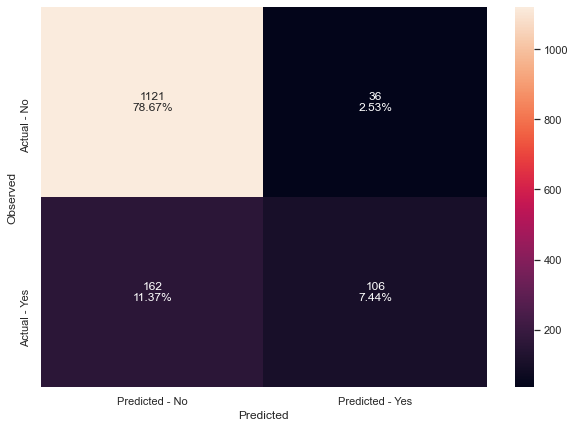

In [257]:
make_confusion_matrix(Model_RF_tuned, y_test)

### Insights
- Training data Accuracy, Recall and precision on the tuned bagging model indicates the model is less overfitting, as they reduced   significantly. 
- However all these scores on test data have reduced as well by tuning.
- So it looks like Random forest with default parameters may be better model than the tuned one.


### AdaBoost Classifier. 
- First simple model with default parameters, later by tuning hyper parameters on it using GridSearchCV

In [263]:
AdaBoost_model = AdaBoostClassifier(random_state=1)
AdaBoost_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [264]:
#Using above defined function to get accuracy, recall and precision on train and test set
AdaBoost_model_score=get_metrics_score(AdaBoost_model)

Accuracy on training set :  0.8488862131246238
Accuracy on test set :  0.8392982456140351
Recall on training set :  0.3514376996805112
Recall on test set :  0.2835820895522388
Precision on training set :  0.6962025316455697
Precision on test set :  0.672566371681416


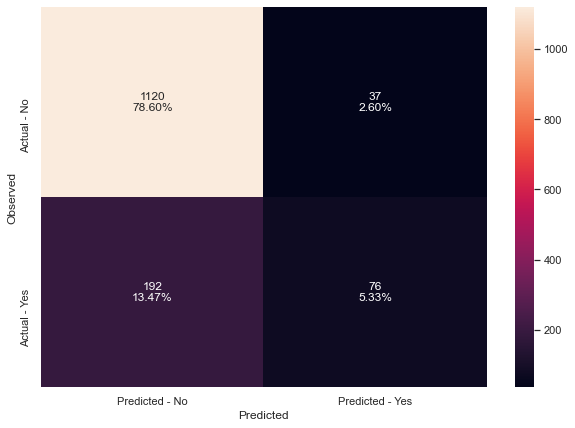

In [265]:
make_confusion_matrix(AdaBoost_model, y_test)

### Gradient Boosting Classifier. 
- First simple model with default parameters, later by tuning hyper parameters on it using GridSearchCV

In [266]:
GradBoost_model = GradientBoostingClassifier(random_state=1)
GradBoost_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [267]:
#Using above defined function to get accuracy, recall and precision on train and test set
GradBoost_model_score=get_metrics_score(GradBoost_model)

Accuracy on training set :  0.8913305237808549
Accuracy on test set :  0.8582456140350877
Recall on training set :  0.4968051118210863
Recall on test set :  0.40671641791044777
Precision on training set :  0.8711484593837535
Precision on test set :  0.7171052631578947


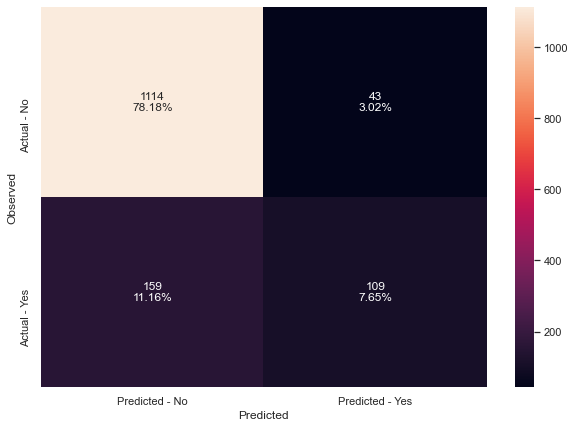

In [268]:
make_confusion_matrix(GradBoost_model, y_test)

### XGBoost Classifier. 
- First simple model with default parameters, later by tuning hyper parameters on it using GridSearchCV

In [270]:
XGBoost_model = XGBClassifier(random_state=1, eval_metric='logloss')
XGBoost_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [271]:
#Using above defined function to get accuracy, recall and precision on train and test set
XGBoost_model_score=get_metrics_score(XGBoost_model)

Accuracy on training set :  0.9993979530403372
Accuracy on test set :  0.9207017543859649
Recall on training set :  0.9968051118210862
Recall on test set :  0.6791044776119403
Precision on training set :  1.0
Precision on test set :  0.8708133971291866


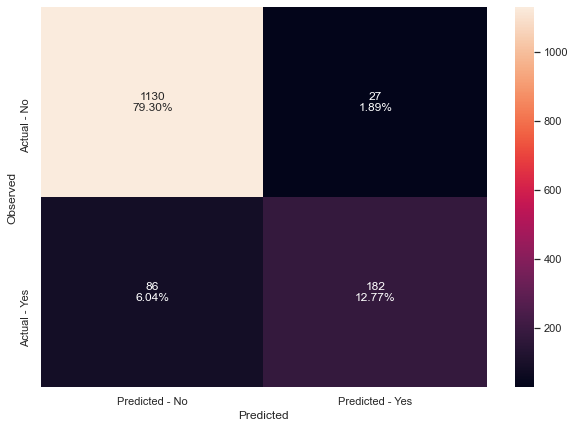

In [272]:
make_confusion_matrix(XGBoost_model, y_test)

### Insight
**Boosting models With default parameters:**
- Accuracy on test data is the best for XGBoost(92%) followed by Gradient Boost(85%) and then AdaBoost(83%). All are pretty high values. 
- Test data Recall score follows the same order XGBoost(67%) followed by Gradient Boost(40%) and then AdaBoost(28%). This looks pretty good on XGBoost.
- Test data Precision follows the same order as well XGBoost(87%) followed by Gradient Boost(71%) and then AdaBoost(67%). This looks very good on XGBoost.
- AS mentioned before as we are looking to reduce marketing cost for un productive customers, reducing False positives is important. This needs high accuracy and that seems to be accomplished by XG Boost. It also has fairly good Recall and very high Accuracy.

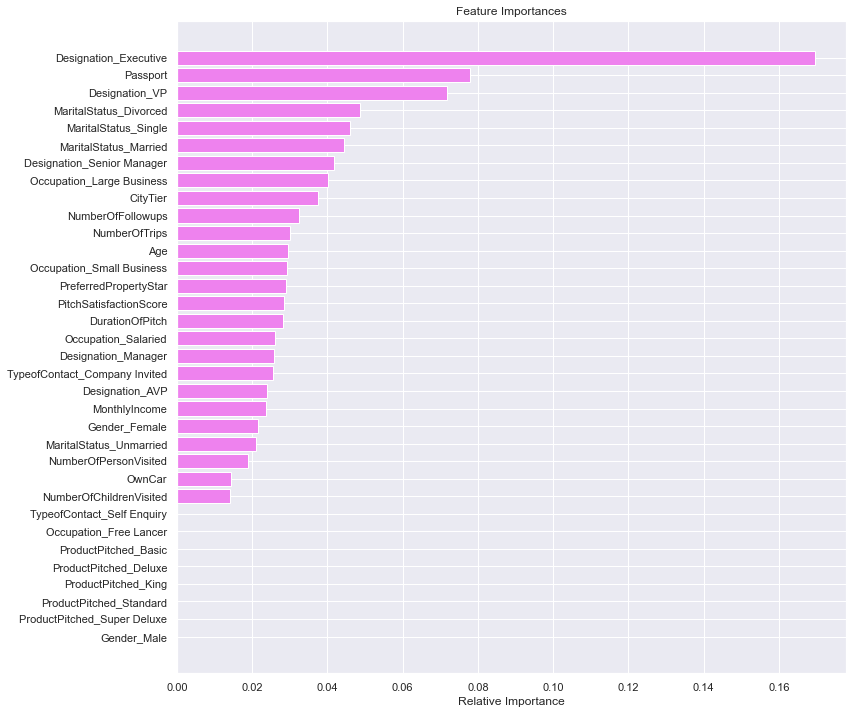

In [364]:
## Which features are important in predicting Tragte variable

importances = XGBoost_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Hyperparameter Tuning

### AdaBoost Classifier

In [273]:
##Picking the right model with best performance by parameters tuning.
Model_AB_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(Model_AB_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
Model_AB_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Model_AB_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.5000000000000002, n_estimators=90,
                   random_state=1)

In [275]:
#Using above defined function to get accuracy, recall and precision on train and test set
Model_AB_tuned_score=get_metrics_score(Model_AB_tuned)

Accuracy on training set :  0.9855508729680915
Accuracy on test set :  0.8568421052631578
Recall on training set :  0.9440894568690096
Recall on test set :  0.5447761194029851
Precision on training set :  0.9784768211920529
Precision on test set :  0.6403508771929824


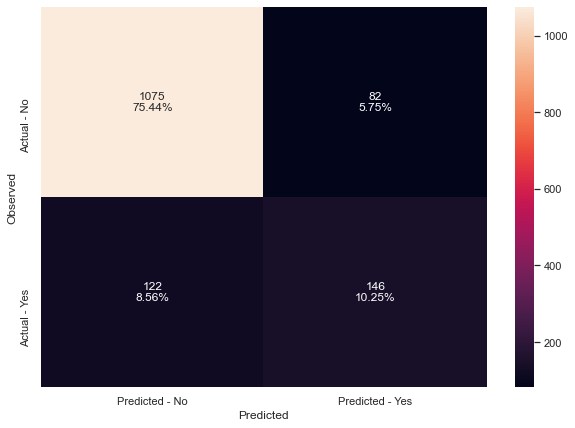

In [276]:
make_confusion_matrix(Model_AB_tuned, y_test)

### Insights
**As compared to the model with default parameters:**

- Test accuracy has increased some and test recall has increased significantly. However test Accuiracy has decreased some.
This is fairly good model.


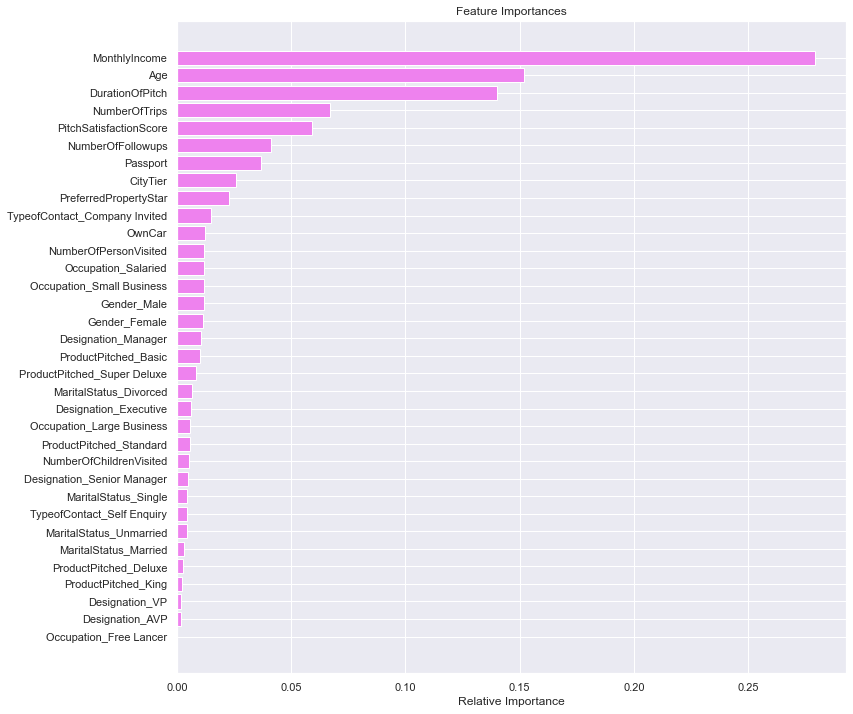

In [278]:
## Which features are important in predicting Tragte variable

importances = Model_AB_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Insight
**Monthly Income is most important feature**

This is followed by Age, Duration Of Pitch, Passport,Number OF Trips, Pitch satisfaction Score and Number OF Follow ups.

## Hyperparameter Tuning

### GradientBoost Classifier

In [283]:
## using AdaBoost classifier as the estimator for initial predictions
Model_GB_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
Model_GB_init.fit(x_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [284]:
#Using above defined function to get accuracy, recall and precision on train and test set
Model_GB_init_score=get_metrics_score(Model_GB_init)

Accuracy on training set :  0.8889223359422035
Accuracy on test set :  0.856140350877193
Recall on training set :  0.48242811501597443
Recall on test set :  0.373134328358209
Precision on training set :  0.8703170028818443
Precision on test set :  0.7299270072992701


In [285]:
## using DecisionTree classifier as the estimator for initial predictions
Model_GB_DTinit = GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),random_state=1)
Model_GB_DTinit.fit(x_train,y_train)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           random_state=1)

In [286]:
#Using above defined function to get accuracy, recall and precision on train and test set
Model_GB_init_score=get_metrics_score(Model_GB_DTinit)

Accuracy on training set :  1.0
Accuracy on test set :  0.8757894736842106
Recall on training set :  1.0
Recall on test set :  0.7052238805970149
Precision on training set :  1.0
Precision on test set :  0.6585365853658537


**Comparing between Adaboost and Decision Tree as init parameters:**

- Decison Tree although overfitting on train data, Test accuracy  increased and test recall have increased significantly than using AdaBoost as initializer. Although Precison has gone down some. So depending on which metric we care more based on marketing cost(Precision) and cost of losing customers (Recall), we can pick one model over the other
- However overall performance seems much better for Decision tree initializer.

In [296]:
##Picking the right model with best performance by tuning other parameters.
##Tried Decision Tree for init , but above scores did not seem to change. So using Adaboost below for init

Model_GB_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,250,200],
    "subsample": [0.8,0.9,1],
    "max_features": [0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(Model_GB_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
Model_GB_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Model_GB_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

In [298]:
#Using above defined function to get accuracy, recall and precision on train and test set
Model_GB_tuned_score=get_metrics_score(Model_GB_tuned)

Accuracy on training set :  0.9244431065623119
Accuracy on test set :  0.8708771929824561
Recall on training set :  0.6549520766773163
Recall on test set :  0.47761194029850745
Precision on training set :  0.9213483146067416
Precision on test set :  0.7441860465116279


In [ ]:
Accuracy on training set :  0.8913305237808549
Accuracy on test set :  0.8582456140350877
Recall on training set :  0.4968051118210863
Recall on test set :  0.40671641791044777
Precision on training set :  0.8711484593837535
Precision on test set :  0.7171052631578947

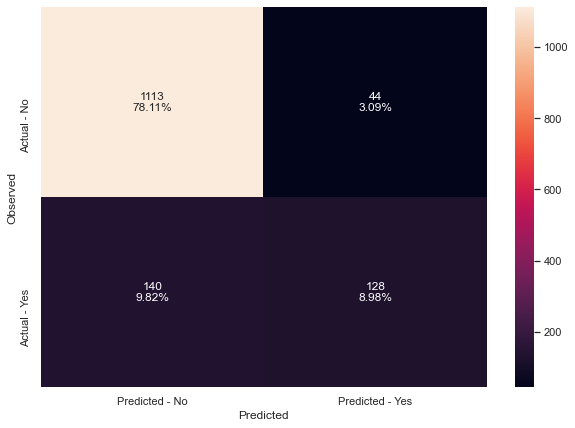

In [299]:
make_confusion_matrix(Model_GB_tuned, y_test)

### Insights
- The tuned Gradient Boost model performace on test data has improved by 2% in terms of accuracy bringing it up to 87 and 7% for recall raising it to 47 and 3% on precision raising it to 74, from using default parameters
- Both False Negatives and False positives have come down when comparing the confusion matrix.

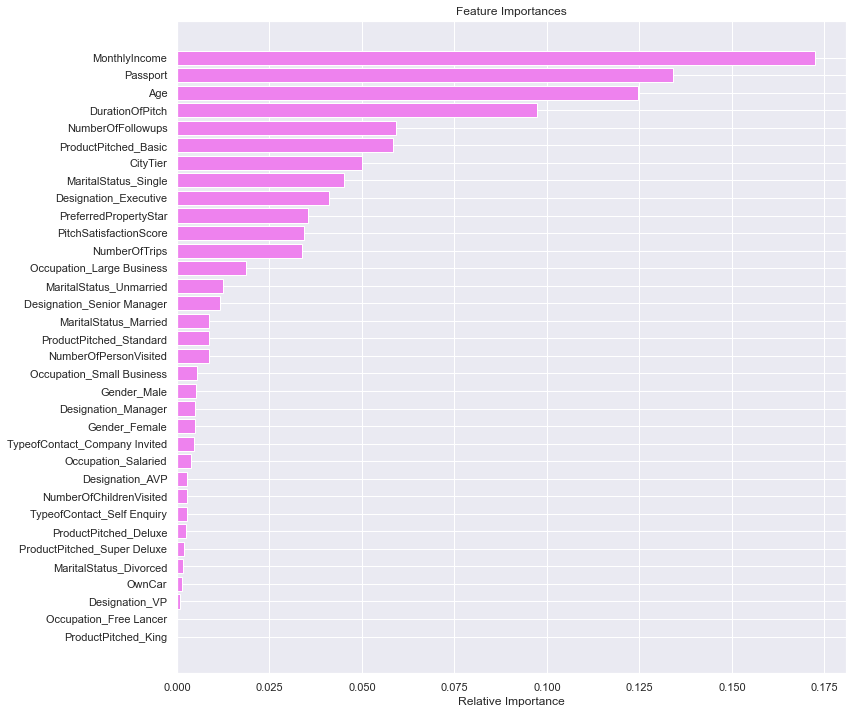

In [300]:
importances = Model_GB_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Insights
**Monthly Income seems most important feature.**

This is followed by Passport,Age,Duration Of Pitch, Basic Product pitched, City Tier.

## Hyperparameter Tuning

### XGBoost Classifier
  - XGBoost has many hyper parameters which can be tuned to increase the model performance.Will try a few.

In [307]:
##Picking the right model with best performance by tuning hyper parameters.
Model_XGB_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(30,110,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(Model_XGB_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
Model_XGB_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Model_XGB_tuned.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [310]:
#Using above defined function to get accuracy, recall and precision on train and test set
Model_XGB_tuned_score=get_metrics_score(Model_XGB_tuned)

Accuracy on training set :  0.9145093317278747
Accuracy on test set :  0.8673684210526316
Recall on training set :  0.9249201277955271
Recall on test set :  0.7873134328358209
Precision on training set :  0.7095588235294118
Precision on test set :  0.6151603498542274


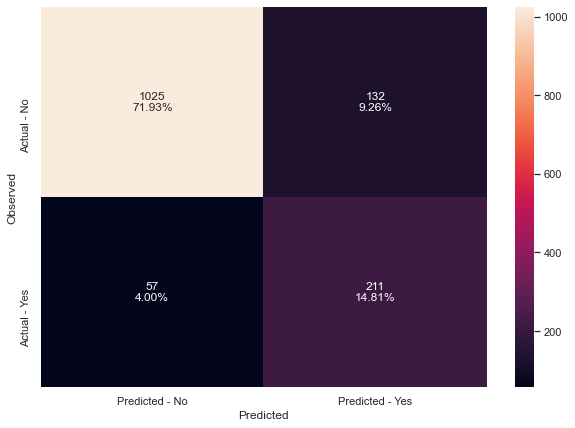

In [311]:
make_confusion_matrix(Model_XGB_tuned, y_test)

### Insights
- Recall is the only metric that was improved by tuning XGboost. Accuracy and Precision was way better in base model.
So this model will be good in picking most possible buyers. But it might also pick non-buyers.


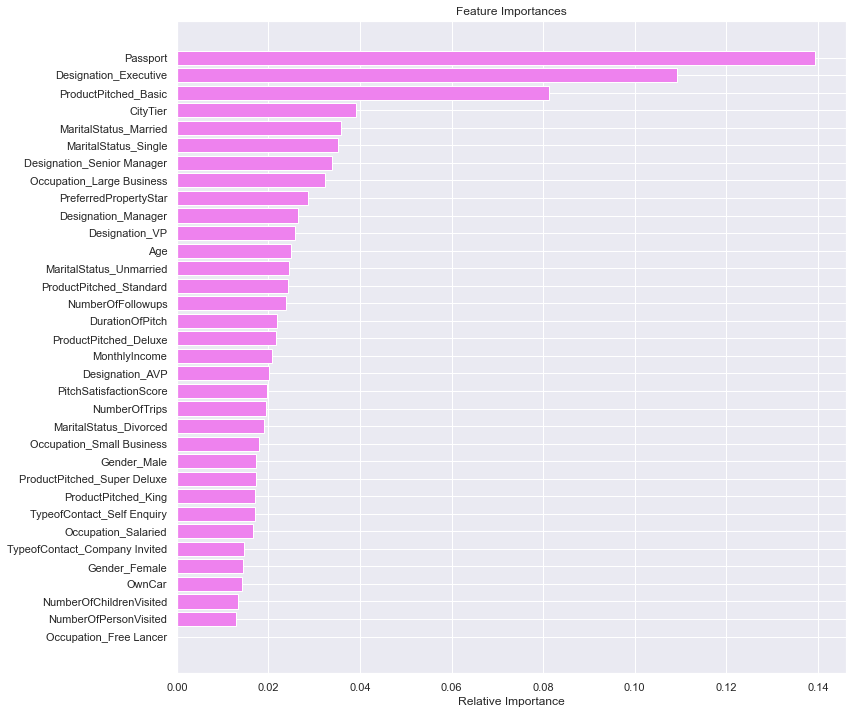

In [312]:
importances = Model_XGB_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Insight
**Passport seems most important feature**

This is followed by Age, designation_executive, Product Pitched Basic and City Tier.

## Stacking Model

In [318]:
estimators=[('Decision Tree', ModelDT),('Random Forest', Model_RF_tuned),
           ('Gradient Boosting', Model_GB_tuned)]
final_estimator=XGBClassifier(random_state=1, eval_metric='logloss')

In [387]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Bagging',
                                BaggingClassifier(max_features=0.9,
                                                  max_samples=0.9,
                                                  n_estimators=50,
                                                  random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=0.7,
                                              colsample_bynode=1,
                                              colsample_bytree=0.7,
                                              eval_metric='logloss', gamma=3,
                                              gpu_id=-1, impo...
                                                 importance_type='gain'

In [388]:
stacking_estimator_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9990969295605057
Accuracy on test set :  0.9164912280701755
Recall on training set :  0.9968051118210862
Recall on test set :  0.753731343283582
Precision on training set :  0.9984
Precision on test set :  0.792156862745098


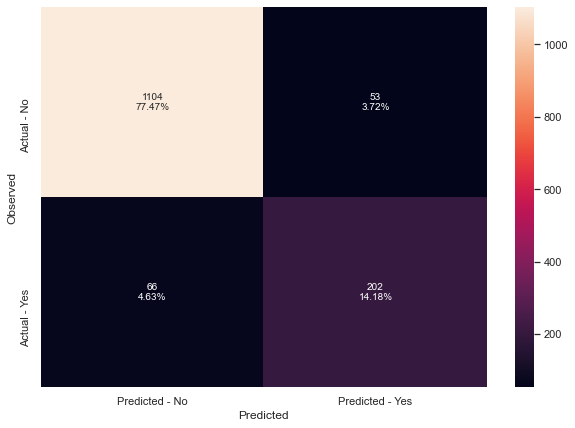

In [389]:
make_confusion_matrix(stacking_estimator, y_test)

### Insights
**Recall and Precision on test looks fairly good on stacking model. Accuracy is high on test data.
Not better than other models overall.**


## Trying to improve stacking classifier by comparing the model performance and using better models as estimators.

In [390]:
estimators=[('Bagging', Model_BG_tuned),('Random Forest', randomforest_model),
           ('XGBoost', Model_XGB_tuned)]
final_estimator=XGBClassifier(random_state=1, eval_metric='logloss')

In [391]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Bagging',
                                BaggingClassifier(max_features=0.9,
                                                  max_samples=0.9,
                                                  n_estimators=50,
                                                  random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=0.7,
                                              colsample_bynode=1,
                                              colsample_bytree=0.7,
                                              eval_metric='logloss', gamma=3,
                                              gpu_id=-1, impo...
                                                 importance_type='gain'

In [392]:
stacking_estimator_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9990969295605057
Accuracy on test set :  0.9164912280701755
Recall on training set :  0.9968051118210862
Recall on test set :  0.753731343283582
Precision on training set :  0.9984
Precision on test set :  0.792156862745098


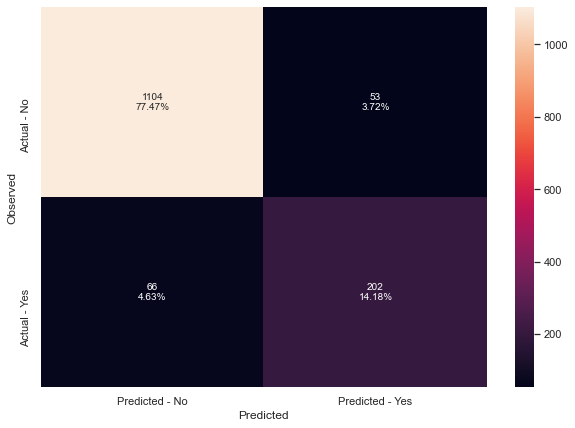

In [393]:
make_confusion_matrix(stacking_estimator, y_test)

### Insights
**Recall (75%) and Precision(79%) on test has improved a lot on this stacking model using the different model estimators. Accuracy is very high(91%) on test data as well.
This is a very good model.**

**Now this may be one of the best models balancing between reducing marketing cost by reducing false positives (hgih accuracy) and also not losing business by reducing false negatives (high recall). This is a win-win for the company.**

**Both False negtives and False positives have come down from the confusion matrix**

## Actionable Insights & Recommendations
- Compare models - Business recommendations and insights

## Comparing all models

In [384]:
# defining list of models
models = [dTree , ModelDT, bagging_model, Model_BG_tuned, randomforest_model, Model_RF_tuned, AdaBoost_model, 
          Model_AB_tuned, GradBoost_model, Model_GB_init, Model_GB_DTinit, Model_GB_tuned, XGBoost_model, Model_XGB_tuned,
          stacking_estimator]  
                    

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))


In [385]:
col_list= ['Decision Tree with default paramters','Decision Tree Tuned', 
           'Bagging Model with default paramters','Bagging Model Tuned',
           'Random Forest with default paramters','Random Forest Tuned',
           'AdaBoost with default paramters','AdaBoost Tuned',
           'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost','Gradient Boosting with init=Decision Tree',
           'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned','Stacking Classifier' ]

In [386]:
comparison_frame = pd.DataFrame({'Model':col_list, 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
print("Comparing performance of all models")
comparison_frame


Comparing performance of all models


,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree with default paramters,1.00,0.88,1.00,0.71,1.00,0.66
1,Decision Tree Tuned,0.84,0.83,0.48,0.43,0.61,0.56
2,Bagging Model with default paramters,0.99,0.91,0.97,0.62,1.00,0.85
3,Bagging Model Tuned,1.00,0.92,1.00,0.66,1.00,0.88
4,Random Forest with default paramters,1.00,0.91,1.00,0.56,1.00,0.90
5,Random Forest Tuned,0.97,0.89,0.85,0.52,0.98,0.81
6,AdaBoost with default paramters,0.85,0.84,0.35,0.28,0.70,0.67
7,AdaBoost Tuned,0.99,0.86,0.94,0.54,0.98,0.64
8,Gradient Boosting with default parameters,0.89,0.86,0.50,0.41,0.87,0.72
9,Gradient Boosting with init=AdaBoost,0.89,0.86,0.48,0.37,0.87,0.73


## Insights and Recommendations:

- When comparing all models looking at the important metrics of Recall and Precision on test data, the improved Stacking Classifier model, Tuned Bagging Classifier, XGBoost with default parameters, XGBoost Tuned are the top 4 models.These will make sure most marketing is done on possible buyers only without missing out on many possible buyers by labelling them as non-buyers.

- If marketing cost needs to reduce and company wants to spend money only on marketing to potential buyers, accuracy should be high. Random Forest with default parameters has 90% accuracy on test data. So this is a top model. It has slightly lower recall though meaning false negatives could be high and company might lose some possible customers

- Please refer to the customer profile section below for information on who to market what product to based on the customer profile for each package. 

- Higher end packages ( like King Super Deluxe etc.) customer profile can be used to market the newly introduced Wellness package.

- Looking at important features from many models commonly Monthly Income , Age , number of trips taken, having a passport, number of followups etc. are important in predicting potential buyers. Customer profile shows what values for these variables are buyers. 
  
- City Tier 2 and 3 seem have higher rate of real customers.
- The more followups the higher is the likelihood of buying.
- Executives followed by Senior Manager are highly likely to buy.

- Use this information to market for the wellness package as well.

- Basic package has clear advantage of most buyers. So you can market that more in future too.

    

**Copied this below information here again as it is important insight and recommendation for the company for marketing.**


### Insights: 
### Customer Profile of those customers who bought the package, for different packages 

### Some general Characteristics for few features:

   No. of kids 1 or 5 did not buy anything.
   Profession, FreeLancer only bought very few Basic package and nothing else.
   City Tier 2 only bought Basic and Standard
   
*********************************************************************************************************

### For different packages, the features not mentioned under them except if mentioned in general characteristics have no significance.

    Basic : Most customers have a Monthly income around 20K (bunch outliers with income almost upto 40K)
            Only pitched to designation executive
            Most customers took 2-4 trips. Oulier upto 8 trips. couple outliers upto 20 trips.
            Most customers, Age from 25 to 35
            Most customers Duration of pitch from 10-22 mins.
    
    Standard: Most customers have Monthly income in  25K - 30K range (couple outliers with income almost upto 40K)
            Only pitched to designation Senior Manager
            Most customers took 2-4 trips. Oulier upto 8 trips
            Mostly with no. of followups 3, 4 and 5 , lesser with other values.
            Most customers, Age from 33 to 49
            Most customers, duration of pitch from 12-30 mins.
            
    Deluxe: Most customers have Monthly income in  20K - 25K range(bunch outliers with income almost upto 40K)
            Only pitched to designation Manager
            Most customers took 2-5 trips.
            Most customers took 1-6 trips.
            Less customers with no. of followups 1 than others
            Most customers, Age from 32 to 44
            Most customers, duration of pitch from 12-30 mins.
            
    Super Deluxe: Monthly income around 30K (one lower outlier 22k)
           Only pitched to designation AVP
           Only customers who owned a car 
           Only customers with pitch satisfaction score of 3 or 5.
           Divorced people did not buy and very little unmarried people bought
           Mostly with no. of followups 1,2,3, 4
           Much less with 4 kids compaered to 2 and 3
           more male customers than female
           Mostly salaried few small business
           Most customers, Age from 40 to 45
           More company Invited
            Most customers, duration of pitch from 15-20 mins (outlier upto 30)
            
    King : Monthly income around in  34K - 38K range (couple outliers from 17k-21K)
            Only pitched to designation VP 
            Majority customers who owned a car
            Majority customers with pitch satisfaction score of 3 or above
            More customers without a passport bought King than those with a passport
            Most customers took 2-4 trips.
            Unmarried people did not buy King.
            Very few with prefrred property star of 5 bought compared to other stars.
            Mostly with no. of followups 3 and 4. Some with 5 and 6.
            More Female than male
            Mostly small business few salaried and large business
            Most customers, Age from 42 to 56
            Only Self enquiry
            Most customers, duration of pitch around 10 mins.(outlier upto 20)